In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from collections import deque
import time

In [6]:
class ClickStreamProcessor:
    def __init__(self, window_size=6):
        """
        Initialize the click stream processor.
        
        Args:
            window_size (int): Size of the moving window in days
        """
        self.window_size = window_size
        self.clicks_window = deque(maxlen=window_size)
        self.all_dates = []
        self.all_clicks = []
        self.moving_avgs = []
        self.moving_sums = []
        
    def process_click_data(self, date, clicks):
        """
        Process incoming click data for a single day.
        
        Args:
            date (datetime.date): Date of the clicks
            clicks (int): Number of clicks for the day
        """
        # Store all historical data
        self.all_dates.append(date)
        self.all_clicks.append(clicks)
        
        # Update sliding window
        self.clicks_window.append(clicks)
        
        # Calculate moving metrics
        current_avg = sum(self.clicks_window) / len(self.clicks_window)
        current_sum = sum(self.clicks_window)
        
        self.moving_avgs.append(current_avg)
        self.moving_sums.append(current_sum)
        
    def get_metrics_df(self):
        """
        Get all metrics as a DataFrame.
        
        Returns:
            pd.DataFrame: DataFrame containing all metrics
        """
        return pd.DataFrame({
            'date': self.all_dates,
            'clicks': self.all_clicks,
            'moving_avg': self.moving_avgs,
            'moving_sum': self.moving_sums
        })

In [11]:
def simulate_realtime_clicks(processor, delay=0.5):
    """
    Simulate real-time click data streaming.
    
    Args:
        processor (ClickStreamProcessor): Instance of click processor
        delay (float): Simulated delay between data points in seconds
    """
    # Setup plot for real-time visualization
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    start_date = datetime.now() - timedelta(days=29)
    
    for day in range(30):
        # Generate random clicks for the current day
        current_date = (start_date + timedelta(days=day)).date()
        clicks = np.random.randint(50, 200)
        
        # Process the new data point
        processor.process_click_data(current_date, clicks)
        
        # Get current metrics
        df = processor.get_metrics_df()
        
        # Clear previous plots
        ax1.clear()
        ax2.clear()
        
        # Plot metrics
        # Top subplot: Daily clicks and moving average
        ax1.plot(df['date'], df['clicks'], 'bo-', label='Daily Clicks', alpha=0.6)
        ax1.plot(df['date'], df['moving_avg'], 'g--', label='Moving Average', linewidth=2)
        ax1.set_title('Real-time Click Metrics')
        ax1.set_ylabel('Clicks / Moving Average')
        ax1.grid(True, alpha=0.3)
        ax1.legend()
        
        # Bottom subplot: Moving sum
        ax2.plot(df['date'], df['moving_sum'], 'r:', label='Moving Sum', linewidth=2)
        ax2.set_ylabel('Moving Sum')
        ax2.grid(True, alpha=0.3)
        ax2.legend()
        
        # Rotate date labels
        plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
        plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
        
        # Adjust layout and display
        plt.tight_layout()
        plt.draw()
        
        # Print current metrics
        print(f"\rProcessing day {day + 1}/30: {current_date} - "
              f"Clicks: {clicks}, "
              f"Moving Avg: {df['moving_avg'].iloc[-1]:.2f}, "
              f"Moving Sum: {df['moving_sum'].iloc[-1]:.2f}", 
              end='', flush=True)
    
    print("\nSimulation complete!")


Simulation complete!
2024-12-20 - Clicks: 100, Moving Avg: 128.50, Moving Sum: 771.00

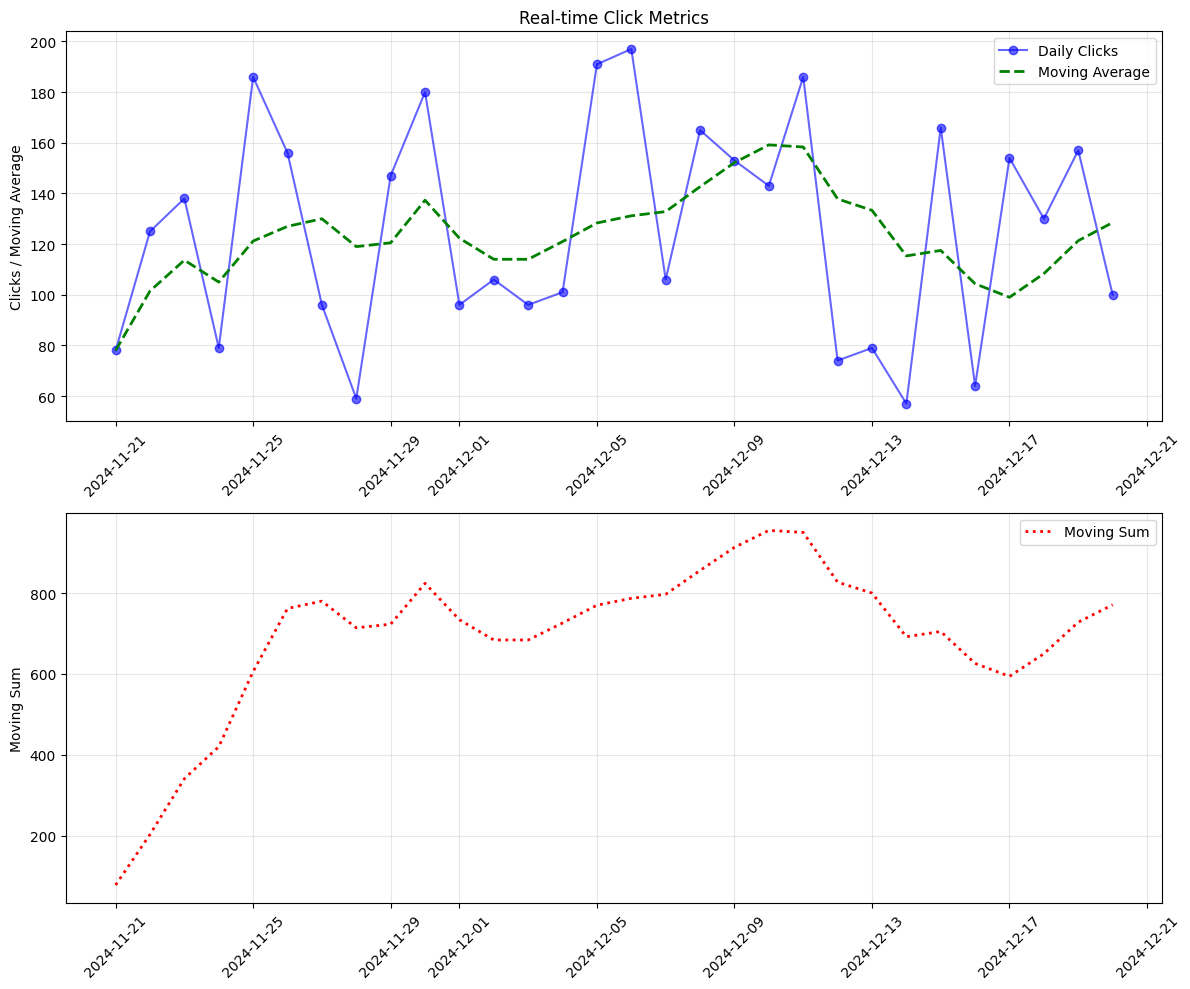

In [12]:
# Create click processor with 6-day window
processor = ClickStreamProcessor(window_size=6)

# Run simulation
simulate_realtime_clicks(processor)

# Display final plot
plt.show()